In [78]:
import pandas as pd 
import numpy as np
from sklearn.impute import SimpleImputer
import plotly_express as px
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.preprocessing import LabelEncoder 
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
import pickle

In [2]:
data=pd.read_csv("C:/Users/admin/Desktop/Final_project/classification_data.csv.csv")

In [3]:
data.shape

(100000, 46)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   count_session           100000 non-null  int64  
 1   count_hit               100000 non-null  int64  
 2   channelGrouping         100000 non-null  object 
 3   totals_newVisits        100000 non-null  int64  
 4   device_browser          100000 non-null  object 
 5   device_operatingSystem  100000 non-null  object 
 6   device_isMobile         100000 non-null  bool   
 7   device_deviceCategory   100000 non-null  object 
 8   geoNetwork_region       100000 non-null  object 
 9   geoNetwork_latitude     100000 non-null  float64
 10  geoNetwork_longitude    100000 non-null  float64
 11  historic_session        100000 non-null  int64  
 12  historic_session_page   100000 non-null  int64  
 13  youtube                 100000 non-null  int64  
 14  avg_session_time     

In [3]:
data["has_converted"].value_counts()

has_converted
1    51727
0    48273
Name: count, dtype: int64

In [4]:
null_percent = data.isnull().mean()*100

In [115]:
colum_with_zero = []
for i in data.columns:
    zero_percent = (data[i]==0).mean()*100
    colum_with_zero.append((i,zero_percent))

In [10]:
colum_with_zero

[('count_session', 0.0),
 ('count_hit', 0.0),
 ('channelGrouping', 0.0),
 ('totals_newVisits', 97.962),
 ('device_browser', 0.0),
 ('device_operatingSystem', 0.0),
 ('device_isMobile', 6.414000000000001),
 ('device_deviceCategory', 0.0),
 ('geoNetwork_region', 0.0),
 ('geoNetwork_latitude', 0.83),
 ('geoNetwork_longitude', 0.83),
 ('historic_session', 0.0),
 ('historic_session_page', 63.239000000000004),
 ('youtube', 100.0),
 ('avg_session_time', 0.0),
 ('avg_session_time_page', 63.239000000000004),
 ('single_page_rate', 6.4350000000000005),
 ('sessionQualityDim', 0.0),
 ('last_visitId', 0.0),
 ('latest_visit_id', 0.0),
 ('visitId_threshold', 0.0),
 ('earliest_visit_id', 0.0),
 ('earliest_visit_number', 0.0),
 ('latest_visit_number', 0.0),
 ('time_earliest_visit', 0.016),
 ('time_latest_visit', 0.01),
 ('avg_visit_time', 0.013999999999999999),
 ('days_since_last_visit', 100.0),
 ('days_since_first_visit', 9.138),
 ('visits_per_day', 0.0),
 ('bounce_rate', 96.614),
 ('earliest_source', 

In [5]:
# To find the zero for the historic_session_page
his_list = []
for i in  data["historic_session_page"].tolist():
   his_list.append(i)
# convert the list to a numpy array
his_array = np.array(his_list)
# compute the mean of the non-zero values
average_nonzero = his_array[his_array>0].mean()
# print the result
print(average_nonzero)
#import numpy as np
# create a sparse array with some zero values
X = np.array(his_array)
# reshape the array into a 2D array with one column
X = X.reshape(-1, 1)
# create an imputer object with mean strategy
imp = SimpleImputer(missing_values=0, strategy='mean')
# fit the imputer on the data
imp.fit(X)
# transform the data
X_imp = imp.transform(X)
# print the imputed data
print(X_imp)

5101.400968417616
[[1254.        ]
 [1254.        ]
 [4963.        ]
 ...
 [5101.40096842]
 [5101.40096842]
 [5101.40096842]]


In [7]:
data_mod = data.drop(["youtube","days_since_last_visit","bounce_rate","bounces"], axis=1)

In [86]:
data_mod.shape

(100000, 42)

In [8]:
data_mod.duplicated().sum()

90793

In [11]:
data_mod_dup = data_mod.drop_duplicates()

In [12]:
data_mod_dup.shape

(9207, 42)

In [13]:
data_mod_dup["has_converted"].value_counts()

has_converted
0    5374
1    3833
Name: count, dtype: int64

In [14]:
data_plt = data_mod_dup
fig = px.scatter_mapbox(data_plt,
                        lat ="geoNetwork_latitude",
                         lon = "geoNetwork_longitude",
                          hover_data = ["geoNetwork_region"] )

fig.update_layout(
    mapbox_style = "carto-positron"
)              
           

In [15]:
#Save the dataframe to csv file
data_mod_dup.to_csv("Classi_predict_data.csv",index = False)

In [16]:
data_new = pd.read_csv("Classi_predict_data.csv")

In [26]:
data_new

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,earliest_keyword,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),(not set),True,True,1900,5617,0,food////food////food,0,01-01-2021
1,28,1816,Paid Search,0,GoogleAnalytics,Android,True,mobile,Ajman,25.4052,...,(not set),(automatic matching),True,True,3843,77417,1477195214,"(not set)////baby_products--milk,_food_&_juice...",1,01-01-2021
2,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,custom0==marketplace&+id==*,True,True,592,1576,0,food////food,0,01-01-2021
3,3,507,Paid Search,0,GoogleAnalytics,iOS,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace,custom0==marketplace,True,True,507,1958,28745286,(not set)////(not set)////baby_products--chang...,1,01-01-2021
4,9,1037,Paid Search,0,GoogleAnalytics,Android,True,mobile,Dubai,25.2048,...,(not set),(not set),True,True,1674,138440,1054124685,food////food////food////food////food////food//...,1,01-01-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9202,1,195,Paid Search,0,GoogleAnalytics,iOS,True,mobile,Abu Dhabi,24.4539,...,carrefour,carrefour,True,True,471,278,0,(not set)////(not set),0,01-01-2021
9203,28,3071,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==nonfood,custom0==marketplace,True,True,4071,3810,183879066,food////food////food,0,01-01-2021
9204,7,1018,Paid Search,0,GoogleAnalytics,iOS,True,mobile,Dubai,25.2048,...,custom0==marketplace,custom0==marketplace,True,True,7258,0,363923999,"baby_products--changing_&_bathing--diapers,_wi...",1,01-01-2021
9205,6,818,Paid Search,0,GoogleAnalytics,Android,True,mobile,Dubai,25.2048,...,(not set),OJ2c1OnsSm5Ghzab,True,True,818,2958,0,food////food////food////food////food,0,01-01-2021


In [17]:

data_os = data_new["device_operatingSystem"].value_counts()
data_device = data_new["device_deviceCategory"].value_counts()
print(data_os)
print(data_device)
color = sns.color_palette("husl",len(data_os))
fig_bar= px.bar(data_new, x='device_operatingSystem', y="device_deviceCategor",hover_data=["number_of_reviews"],color_discrete_sequence=px.colors.sequential.Redor_r, width=600, height=500)
plt.plotly_chart(fig_bar)
#plt.figure(figsize=(14,7))
#data_os.plot(kind="bar",color=color)
#data_device.plot(kind="bar",color=color) # adjust the position and width of the first column
#data_device.plot(kind="bar",color=color) # adjust the position 
plt.show()

device_operatingSystem
Android      4796
iOS          3874
Windows       429
Macintosh     102
Chrome OS       3
Linux           2
(not set)       1
Name: count, dtype: int64
device_deviceCategory
mobile     8603
desktop     567
tablet       37
Name: count, dtype: int64


ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['count_session', 'count_hit', 'channelGrouping', 'totals_newVisits', 'device_browser', 'device_operatingSystem', 'device_isMobile', 'device_deviceCategory', 'geoNetwork_region', 'geoNetwork_latitude', 'geoNetwork_longitude', 'historic_session', 'historic_session_page', 'avg_session_time', 'avg_session_time_page', 'single_page_rate', 'sessionQualityDim', 'last_visitId', 'latest_visit_id', 'visitId_threshold', 'earliest_visit_id', 'earliest_visit_number', 'latest_visit_number', 'time_earliest_visit', 'time_latest_visit', 'avg_visit_time', 'days_since_first_visit', 'visits_per_day', 'earliest_source', 'latest_source', 'earliest_medium', 'latest_medium', 'earliest_keyword', 'latest_keyword', 'earliest_isTrueDirect', 'latest_isTrueDirect', 'num_interactions', 'time_on_site', 'transactionRevenue', 'products_array', 'has_converted', 'target_date'] but received: device_deviceCategor

has_converted
0    5374
1    3833
Name: count, dtype: int64


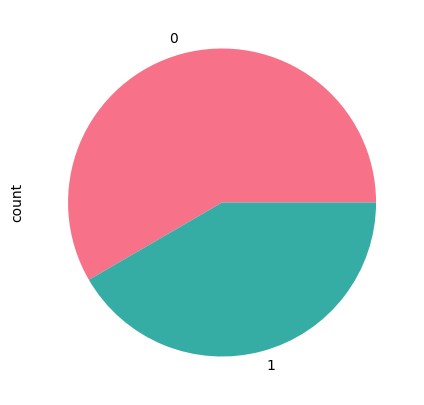

In [18]:
data_convert = data_new["has_converted"].value_counts()
print(data_convert)
color = sns.color_palette("husl",len(data_convert))
plt.figure(figsize=(10,5))
data_convert.plot(kind="pie",colors= color)
plt.show()

In [121]:
data_index=data_new
#data_index.reset_index(drop =True,inplace=True)
data_sum = data_index.groupby("has_converted")[["device_deviceCategory","avg_session_time"]].sum()
fig_count= px.bar(data_sum,  x= "device_deviceCategory",y="avg_session_time",title= "Device used",
                          width=600, height= 650, color_discrete_sequence=px.colors.sequential.Bluered_r)
data_index.reset_index(inplace= True)
plt.show(fig_count)
fig_count

In [19]:
fig_pie_1= px.pie(data_frame=data_new, names= "geoNetwork_region", values="avg_session_time", hover_data= "has_converted",
                      width=1000,title="QUARTER TRANSACTION COUNT PERCENTAGE",hole=0.5, color_discrete_sequence= px.colors.sequential.Magenta_r)
plt.show(fig_pie_1)
fig_pie_1

In [93]:
data_new.columns

Index(['count_session', 'count_hit', 'channelGrouping', 'totals_newVisits',
       'device_browser', 'device_operatingSystem', 'device_isMobile',
       'device_deviceCategory', 'geoNetwork_region', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'historic_session', 'historic_session_page',
       'avg_session_time', 'avg_session_time_page', 'single_page_rate',
       'sessionQualityDim', 'last_visitId', 'latest_visit_id',
       'visitId_threshold', 'earliest_visit_id', 'earliest_visit_number',
       'latest_visit_number', 'time_earliest_visit', 'time_latest_visit',
       'avg_visit_time', 'days_since_first_visit', 'visits_per_day',
       'earliest_source', 'latest_source', 'earliest_medium', 'latest_medium',
       'earliest_keyword', 'latest_keyword', 'earliest_isTrueDirect',
       'latest_isTrueDirect', 'num_interactions', 'time_on_site',
       'transactionRevenue', 'products_array', 'has_converted', 'target_date'],
      dtype='object')

In [20]:
data_new_df = pd.DataFrame(data_new)

lab_enc = LabelEncoder()

for i in data_new_df.select_dtypes(["object"]).columns:
    data_new_df[i] = lab_enc.fit_transform(data_new_df[i])

In [123]:
data_new_df


,index,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,...,earliest_keyword,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,0,9,1194,0,0,5,1,True,1,71,...,4,3,True,True,1900,5617,0,2265,0,0
1,1,28,1816,2,0,5,1,True,1,2,...,4,2,True,True,3843,77417,1477195214,898,1,0
2,2,2,299,2,0,5,1,True,1,1,...,74,75,True,True,592,1576,0,2234,0,0
3,3,3,507,2,0,5,6,True,1,1,...,73,74,True,True,507,1958,28745286,414,1,0
4,4,9,1037,2,0,5,1,True,1,25,...,4,3,True,True,1674,138440,1054124685,2506,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9202,9202,1,195,2,0,5,6,True,1,1,...,46,47,True,True,471,278,0,1,0,0
9203,9203,28,3071,2,0,5,1,True,1,1,...,75,74,True,True,4071,3810,183879066,2265,0,0
9204,9204,7,1018,2,0,5,6,True,1,25,...,73,74,True,True,7258,0,363923999,1353,1,0
9205,9205,6,818,2,0,5,1,True,1,25,...,4,10,True,True,818,2958,0,2299,0,0


In [21]:
corr_data = data_new_df.corr()

In [97]:
corr_data

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,earliest_keyword,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,time_on_site,transactionRevenue,products_array,has_converted,target_date
count_session,1.000000,0.856096,-0.002417,-0.088877,0.111947,0.045597,0.137204,0.132393,-0.056737,-0.000628,...,-0.029079,-0.005495,0.140833,0.118986,0.760016,0.153830,0.091560,0.070176,0.100391,NaN
count_hit,0.856096,1.000000,0.013933,-0.075445,0.115239,0.234980,0.146535,0.142723,-0.087080,0.002825,...,0.024900,0.008262,0.158377,0.129847,0.871843,0.093644,0.088279,-0.029933,0.228865,NaN
channelGrouping,-0.002417,0.013933,1.000000,0.034250,-0.069322,0.146864,-0.093071,-0.093838,-0.025498,0.037036,...,0.213425,0.289109,-0.040494,-0.035887,0.025076,0.002482,0.006980,-0.120481,0.092067,NaN
totals_newVisits,-0.088877,-0.075445,0.034250,1.000000,-0.149279,0.070804,-0.236885,-0.226040,-0.009770,0.003611,...,-0.000829,-0.019441,-0.205269,-0.267001,-0.071458,-0.010688,-0.013183,-0.086941,-0.036781,NaN
device_browser,0.111947,0.115239,-0.069322,-0.149279,1.000000,-0.069150,0.749035,0.723994,0.006916,-0.003827,...,0.008562,0.003386,0.173313,0.114105,0.109237,-0.003234,0.020726,0.146988,0.090626,NaN
device_operatingSystem,0.045597,0.234980,0.146864,0.070804,-0.069150,1.000000,-0.151744,-0.146340,-0.056514,-0.008570,...,0.156723,0.050595,0.044024,-0.002832,0.259398,-0.167705,-0.022248,-0.529317,0.531552,NaN
device_isMobile,0.137204,0.146535,-0.093071,-0.236885,0.749035,-0.151744,1.000000,0.967346,0.003020,0.005859,...,0.013025,-0.001940,0.210219,0.154807,0.133416,-0.022918,0.014129,0.173554,0.099949,NaN
device_deviceCategory,0.132393,0.142723,-0.093838,-0.226040,0.723994,-0.146340,0.967346,1.000000,0.004267,0.006415,...,0.005739,-0.005188,0.204934,0.148545,0.128811,-0.020917,0.012016,0.168784,0.093268,NaN
geoNetwork_region,-0.056737,-0.087080,-0.025498,-0.009770,0.006916,-0.056514,0.003020,0.004267,1.000000,0.076802,...,0.022041,0.033009,-0.017886,-0.001175,-0.086958,-0.016474,-0.031397,0.003927,-0.059370,NaN
geoNetwork_latitude,-0.000628,0.002825,0.037036,0.003611,-0.003827,-0.008570,0.005859,0.006415,0.076802,1.000000,...,0.024100,0.013879,-0.017459,0.002088,-0.006931,-0.007762,-0.006867,0.000673,-0.005509,NaN


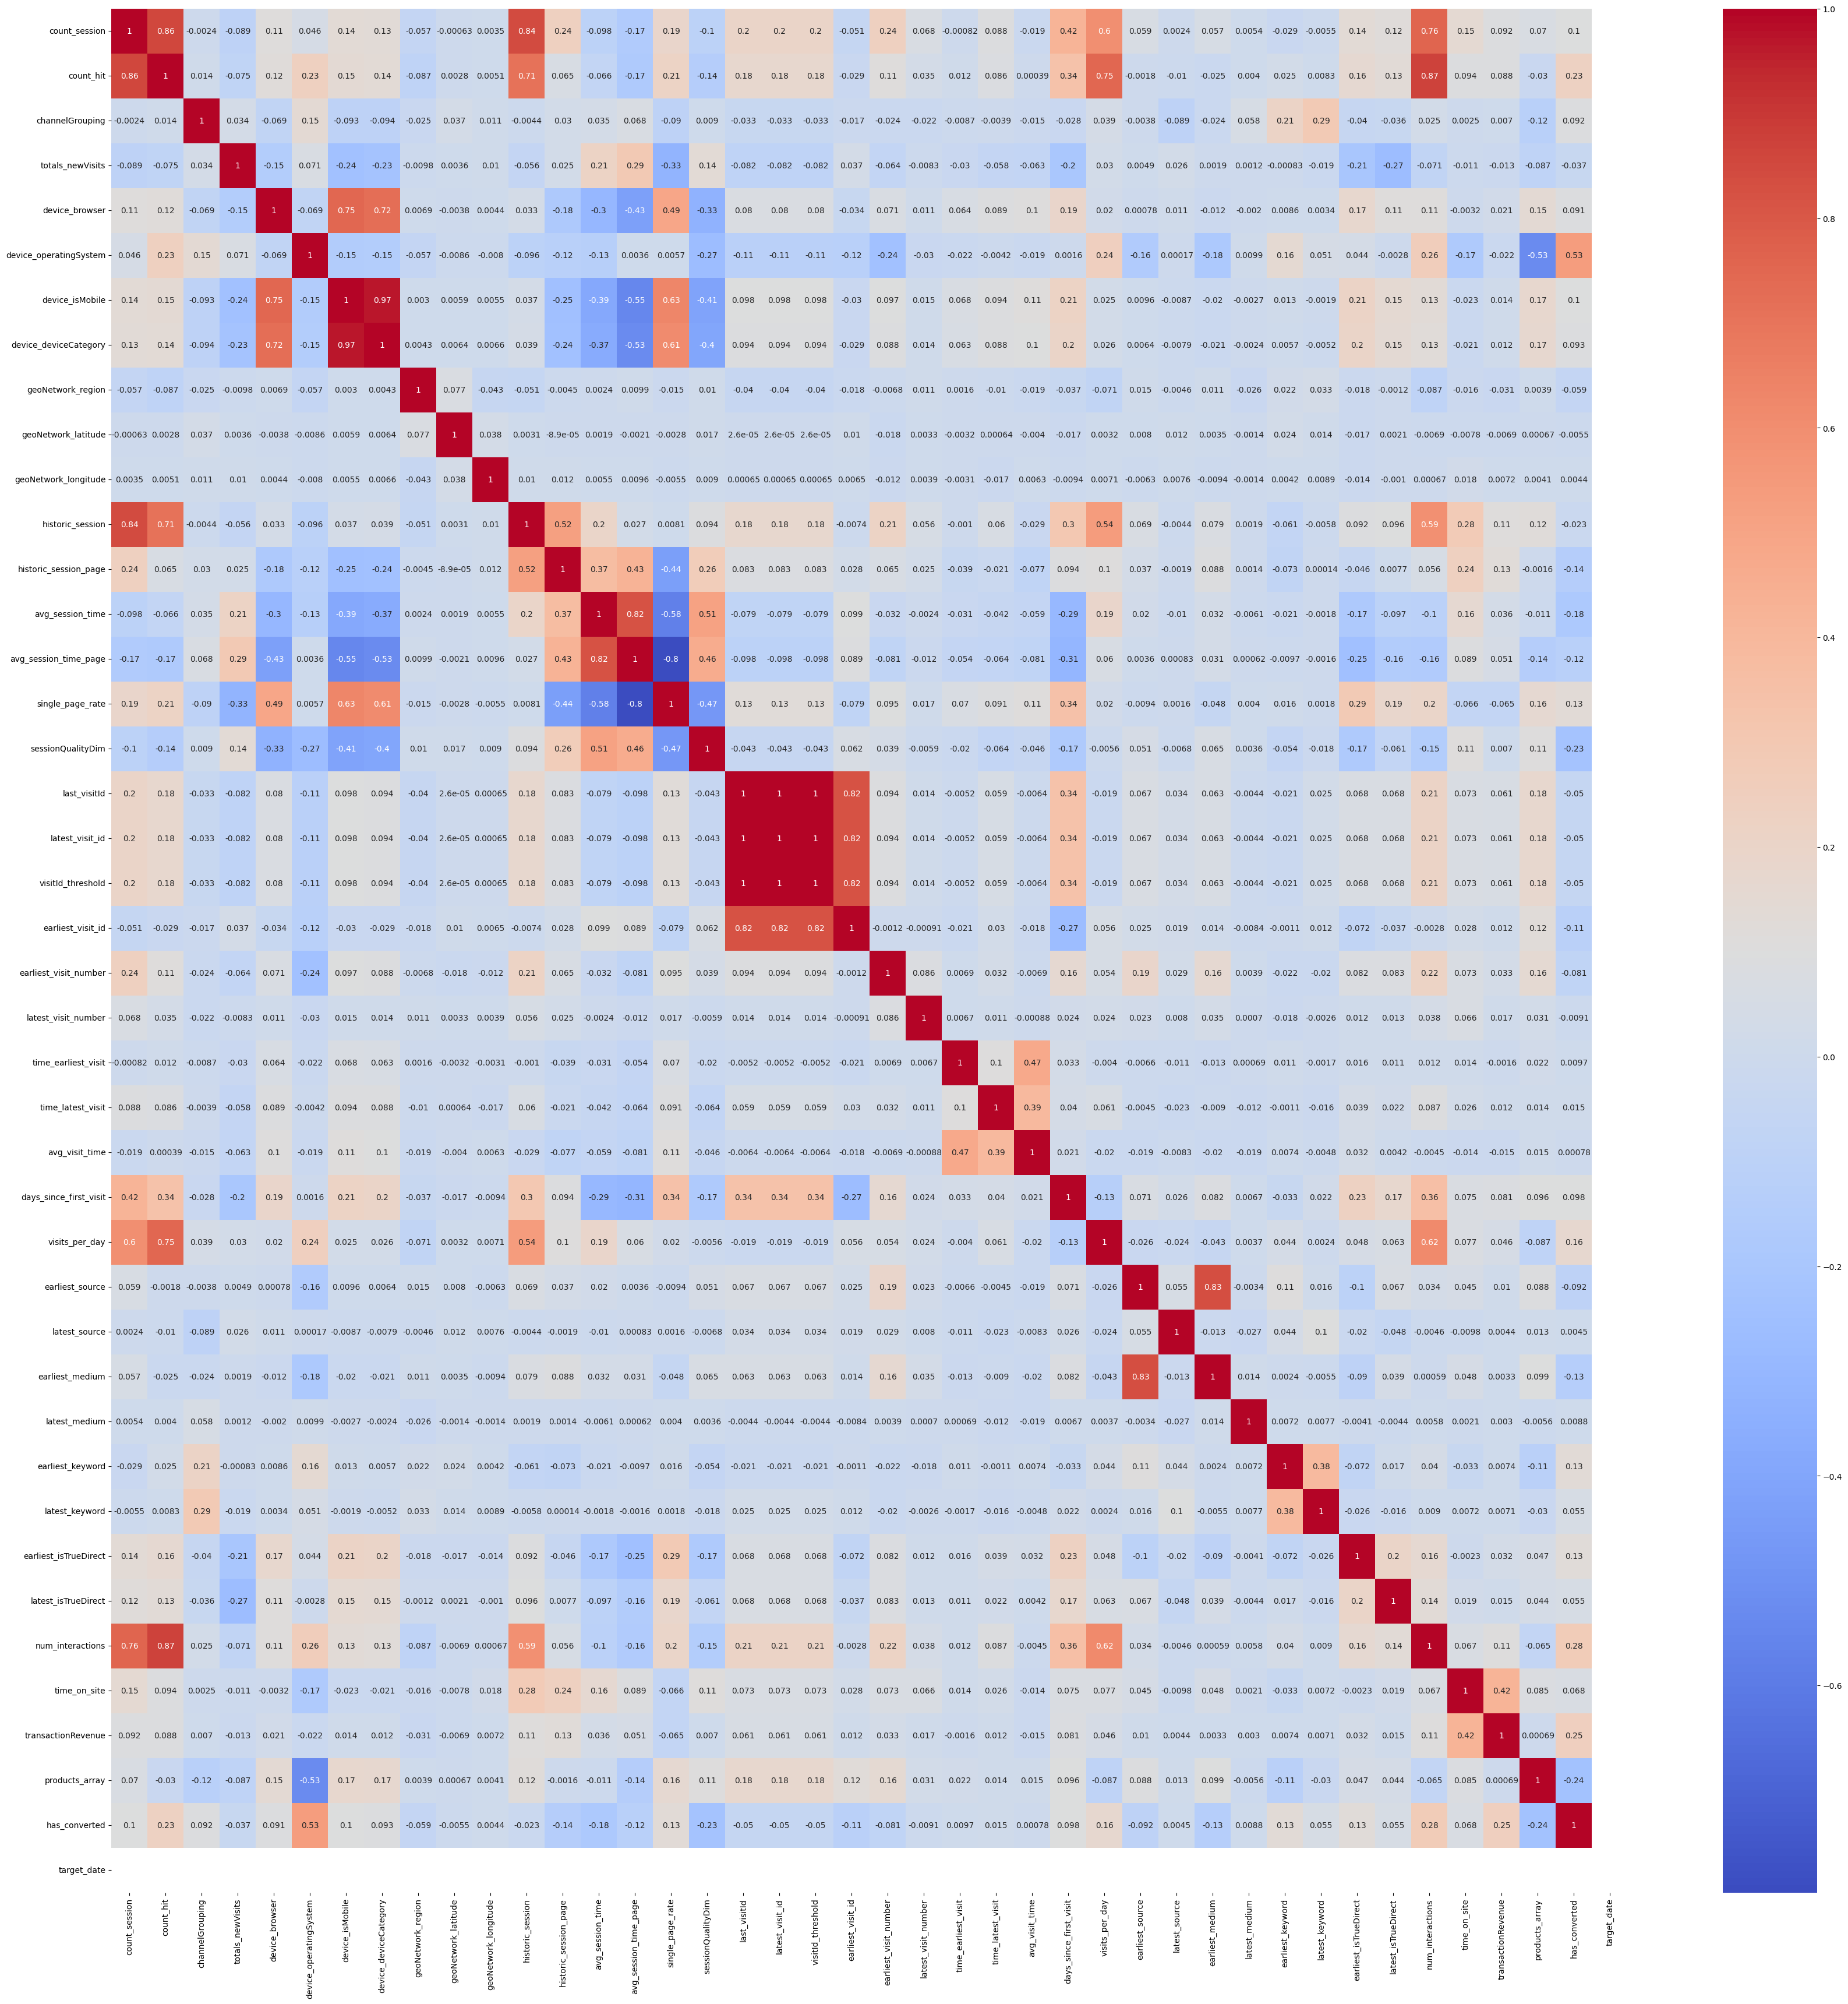

In [22]:
plt.figure(figsize=(42,42))
sns.heatmap(corr_data.head(1000),annot=True,cmap="coolwarm")
plt.show()

In [23]:
data_new2 = data_new_df.drop(["count_session","count_hit","channelGrouping","device_isMobile","geoNetwork_latitude","single_page_rate","geoNetwork_longitude","totals_newVisits","num_interactions","target_date","historic_session_page","latest_visit_id","sessionQualityDim","avg_session_time_page","last_visitId","avg_visit_time","latest_source","earliest_visit_number","latest_isTrueDirect","latest_visit_number","time_earliest_visit","time_latest_visit","days_since_first_visit","earliest_visit_id","earliest_source","earliest_medium","earliest_keyword","latest_medium","latest_keyword","earliest_isTrueDirect","time_on_site"],axis=1)


In [24]:
data_new2.reset_index(drop=True,inplace=True)

In [25]:
data_new2.columns

Index(['device_browser', 'device_operatingSystem', 'device_deviceCategory',
       'geoNetwork_region', 'historic_session', 'avg_session_time',
       'visitId_threshold', 'visits_per_day', 'transactionRevenue',
       'products_array', 'has_converted'],
      dtype='object')

In [26]:
data_new2.rename(columns={
    'index': 'idx',
    'device_browser': 'browser',
    'device_operatingSystem': 'os',
    'device_deviceCategory': 'device_cat',
    'geoNetwork_region': 'region',
    'historic_session': 'hist_session',
    'avg_session_time': 'avg_sess_time',
    'visitId_threshold': 'visitId',
    'visits_per_day': 'visit_pd',
    'transactionRevenue': 'trans_rev',
    'products_array': 'prod_array',
    'has_converted': 'converted'
}, inplace=True)

In [27]:
data_new2

,browser,os,device_cat,region,hist_session,avg_sess_time,visitId,visit_pd,trans_rev,prod_array,converted
0,5,1,1,71,6504,722.666667,1617217803,66.333333,0,2265,0
1,5,1,1,2,12466,445.214286,1617275532,73.480000,1477195214,898,1
2,5,1,1,1,1575,787.500000,1615301676,37.375000,0,2234,0
3,5,6,1,1,1000,333.333333,1613977212,253.500000,28745286,414,1
4,5,1,1,25,3659,406.555556,1617089505,41.480000,1054124685,2506,1
...,...,...,...,...,...,...,...,...,...,...,...
9202,5,6,1,1,166,166.000000,1613761724,195.000000,0,1,0
9203,5,1,1,1,15860,566.428571,1617194911,99.064516,183879066,2265,0
9204,5,6,1,25,859,122.714286,1617193032,44.260870,363923999,1353,1
9205,5,1,1,25,1772,295.333333,1616641350,32.720000,0,2299,0


In [28]:
#hypo test 
t_statistic,p_values = stats.ttest_ind(data_new2["prod_array"],data_new2["converted"])

In [29]:
p_values

0.0

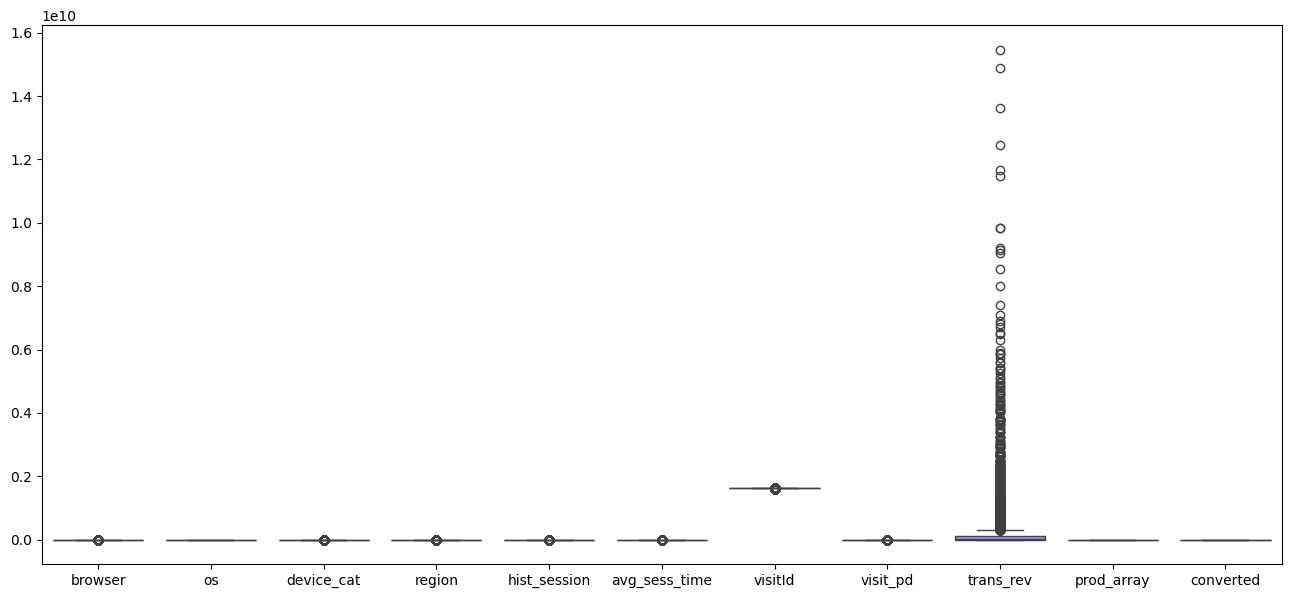

In [30]:
#Checking Outliers
plt.figure(figsize=(16,7))
sns.boxplot(data=data_new2)
plt.show()

In [43]:
#Handling Outliers
def inverse_trans(x):
     return 1/x if x != 0 else 0  # Return 0 if x is 0

data_inverse = data_new2.copy()
data_inverse["trans_rev"]=data_new2["trans_rev"].apply(inverse_trans)

In [44]:
data_inverse

,browser,os,device_cat,region,hist_session,avg_sess_time,visitId,visit_pd,trans_rev,prod_array,converted
0,5,1,1,71,6504,722.666667,1617217803,66.333333,0.000000e+00,2265,0
1,5,1,1,2,12466,445.214286,1617275532,73.480000,6.769586e-10,898,1
2,5,1,1,1,1575,787.500000,1615301676,37.375000,0.000000e+00,2234,0
3,5,6,1,1,1000,333.333333,1613977212,253.500000,3.478831e-08,414,1
4,5,1,1,25,3659,406.555556,1617089505,41.480000,9.486544e-10,2506,1
...,...,...,...,...,...,...,...,...,...,...,...
9202,5,6,1,1,166,166.000000,1613761724,195.000000,0.000000e+00,1,0
9203,5,1,1,1,15860,566.428571,1617194911,99.064516,5.438357e-09,2265,0
9204,5,6,1,25,859,122.714286,1617193032,44.260870,2.747826e-09,1353,1
9205,5,1,1,25,1772,295.333333,1616641350,32.720000,0.000000e+00,2299,0


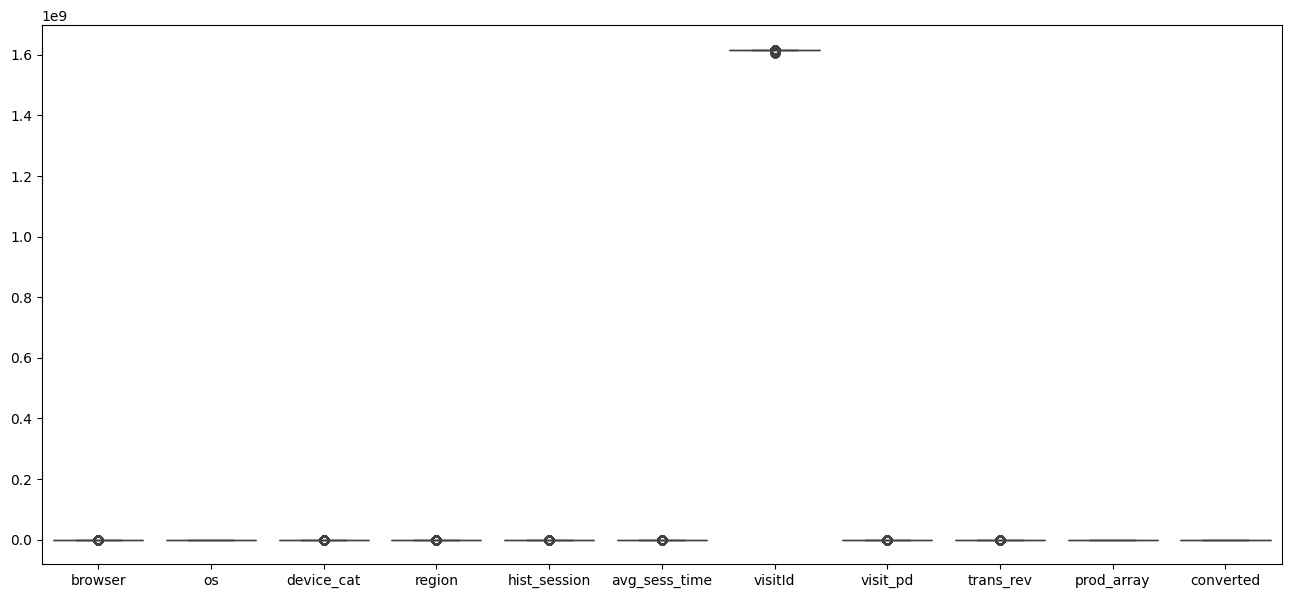

In [45]:
#Checking Outliers After handling
plt.figure(figsize=(16,7))
sns.boxplot(data=data_inverse)
plt.show()

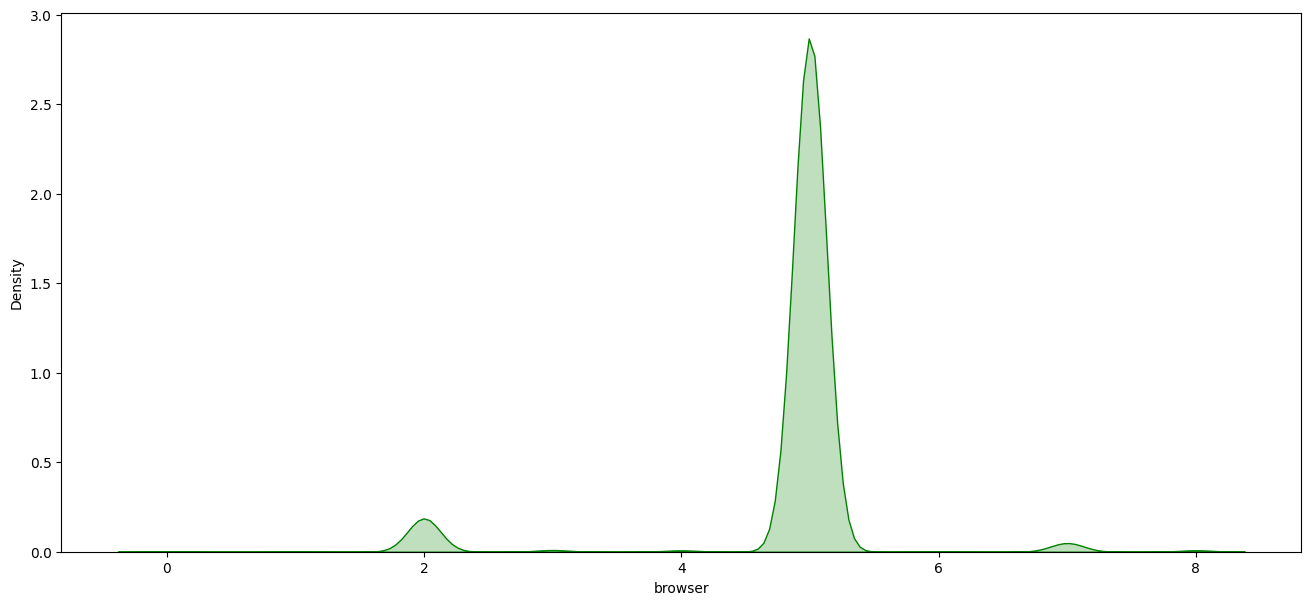

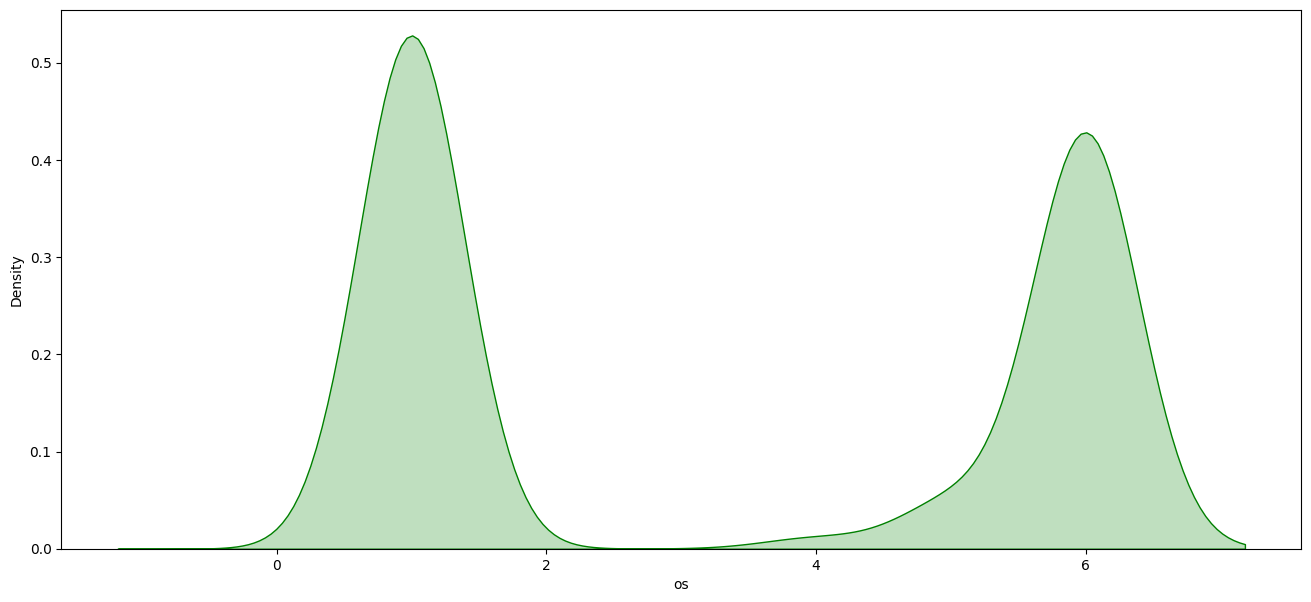

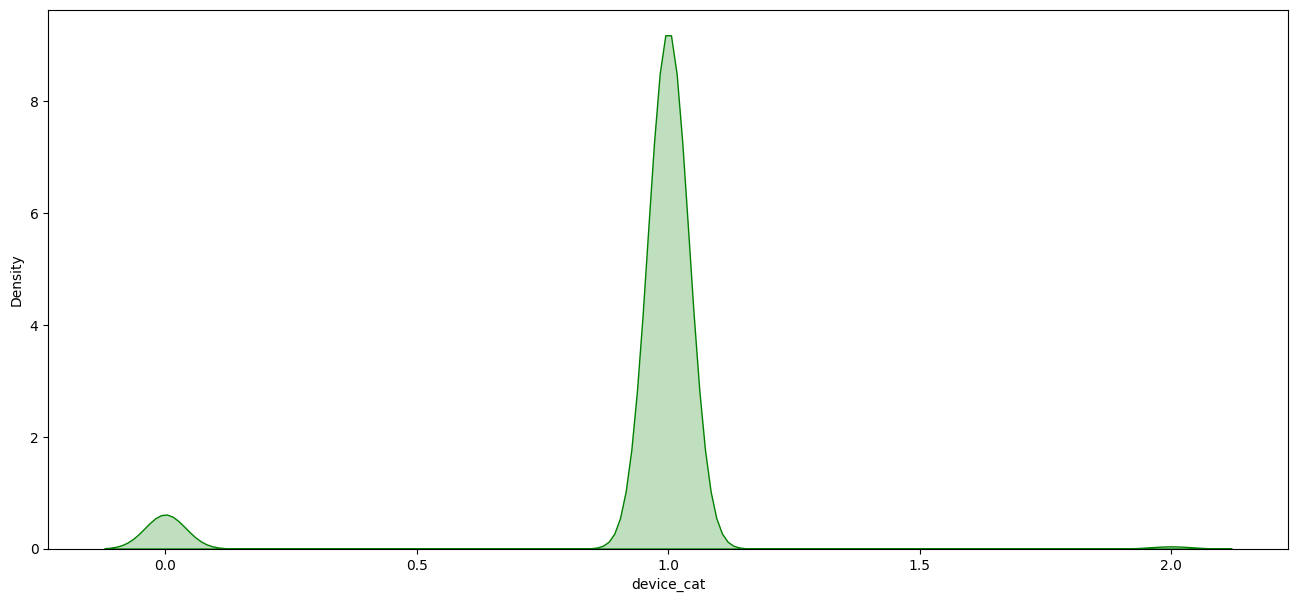

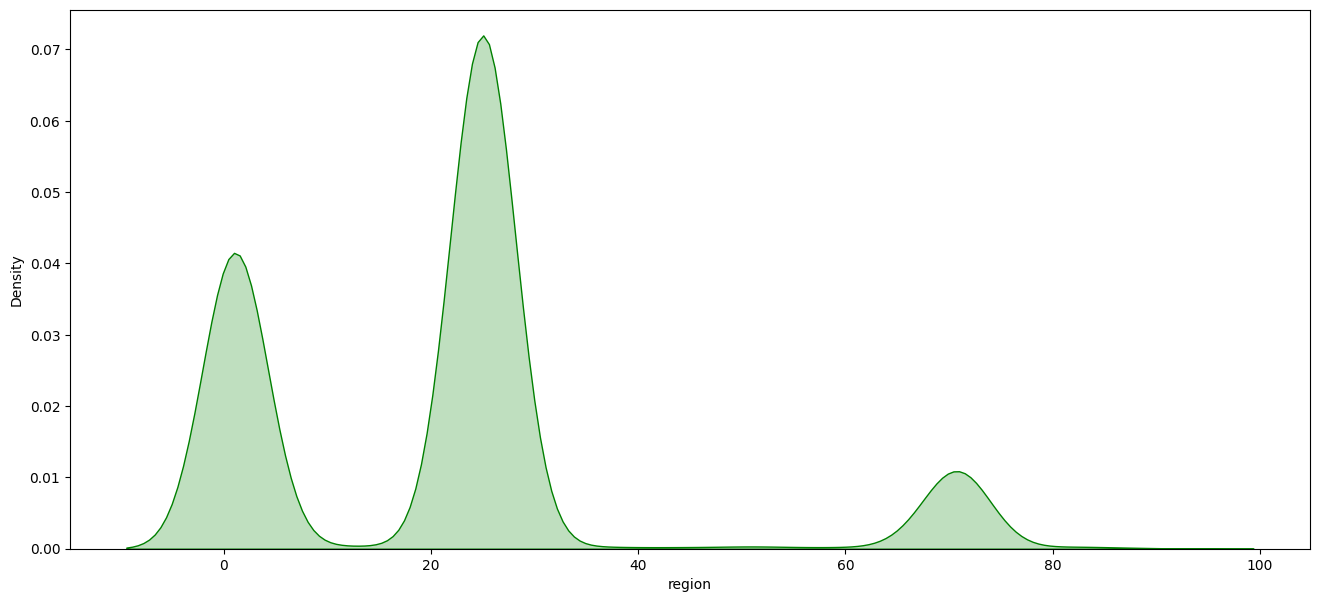

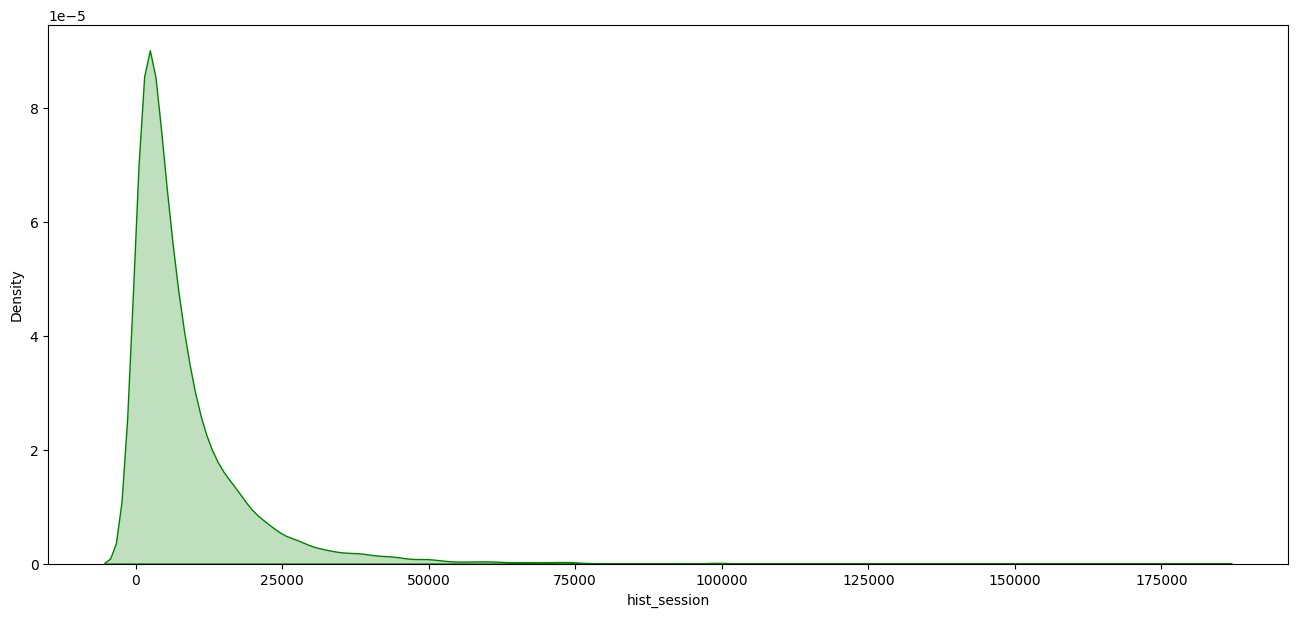

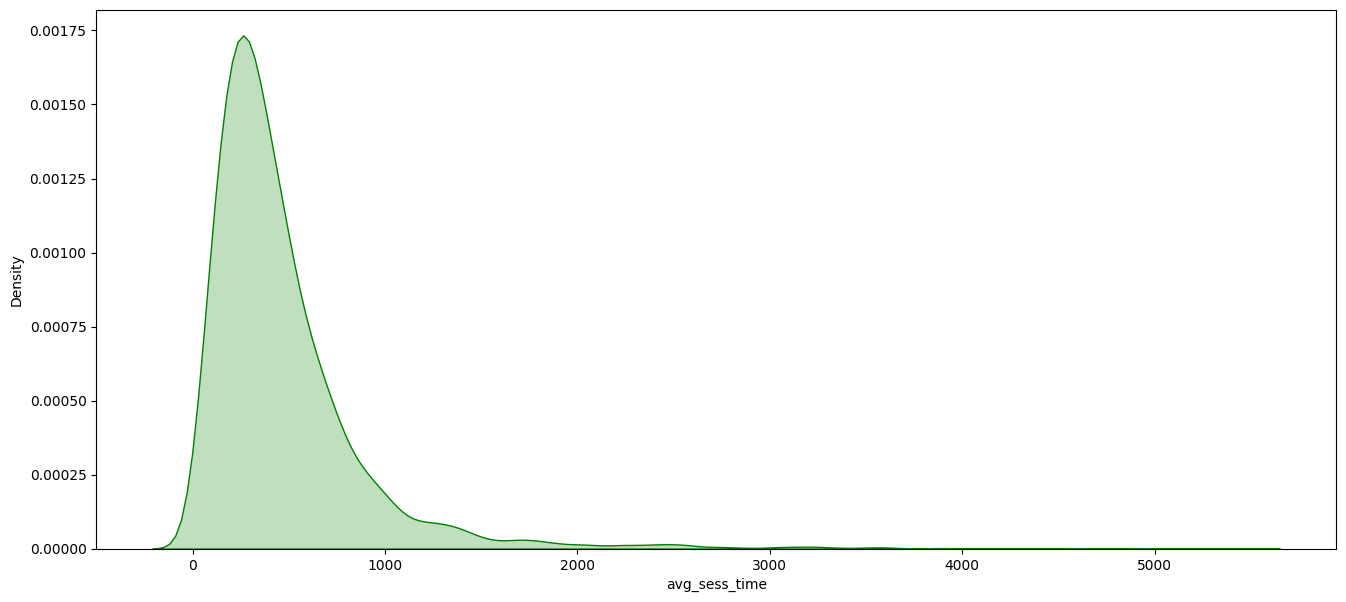

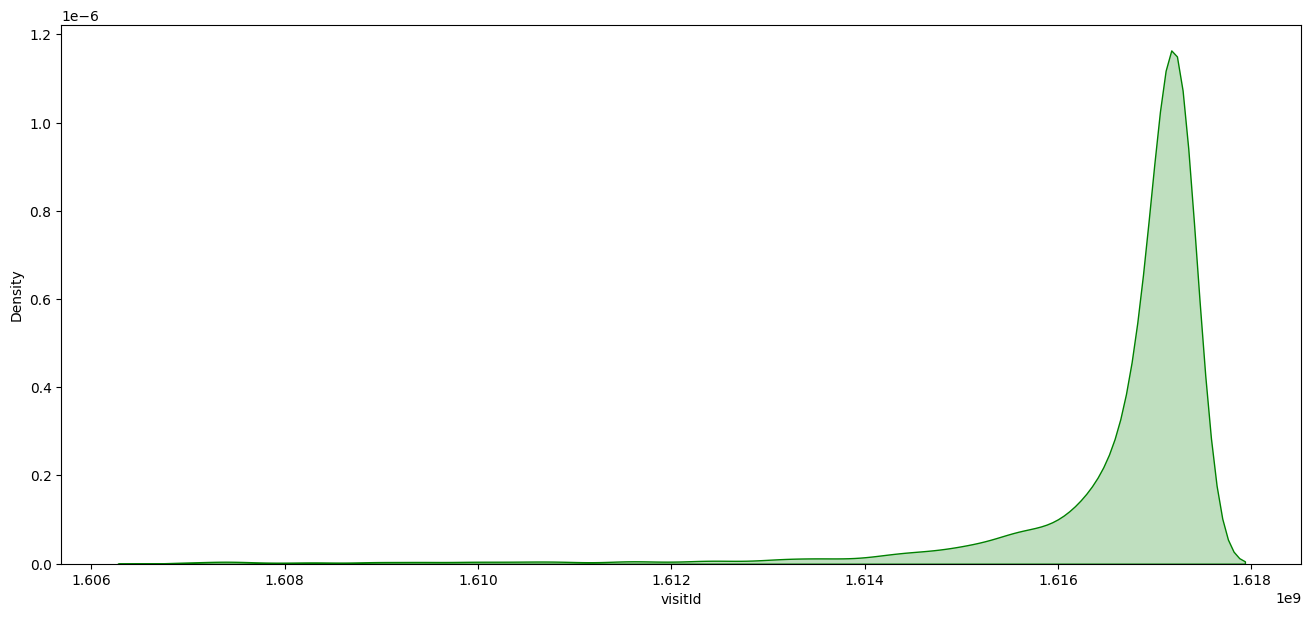

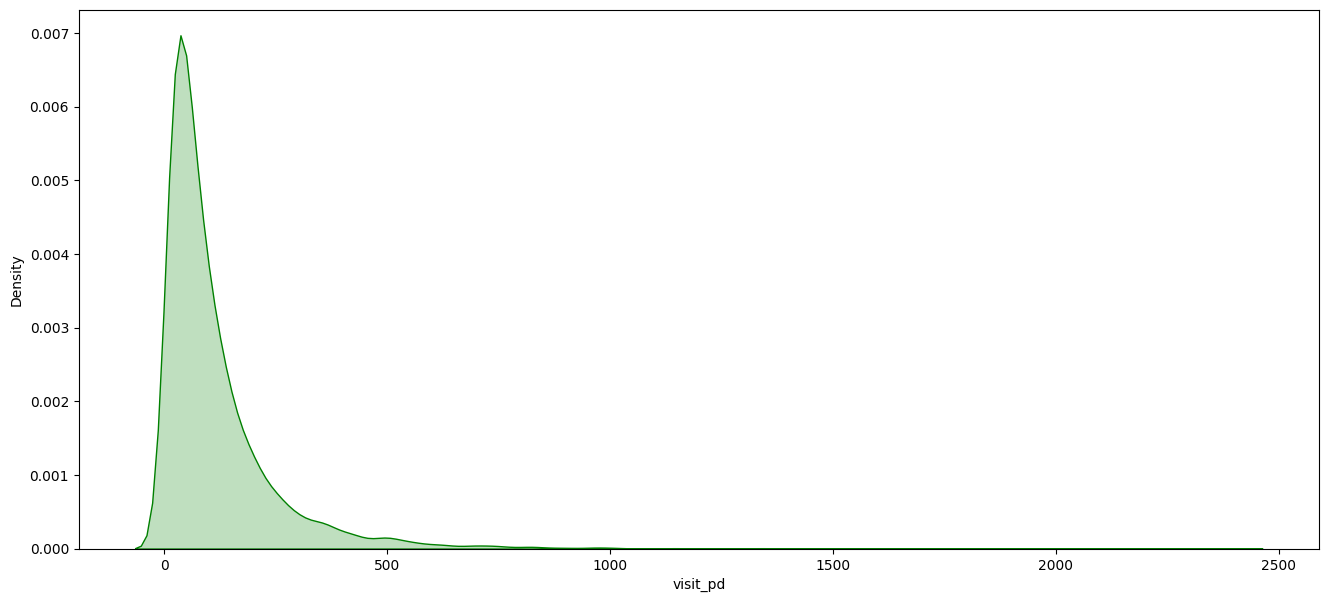

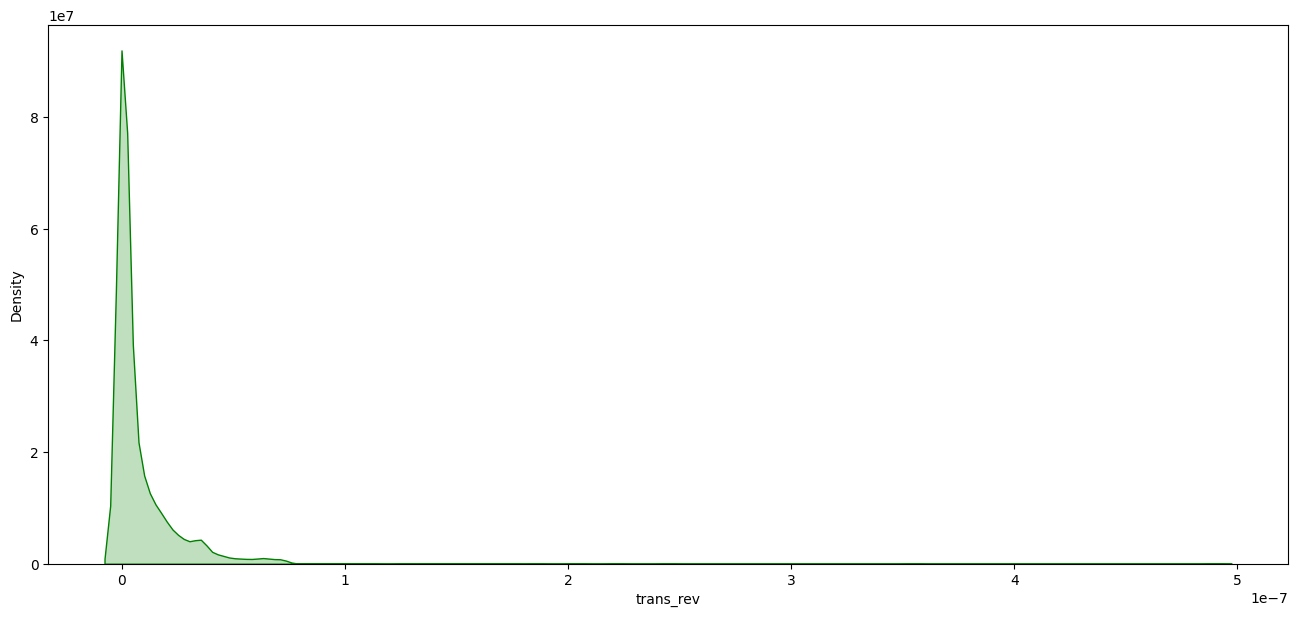

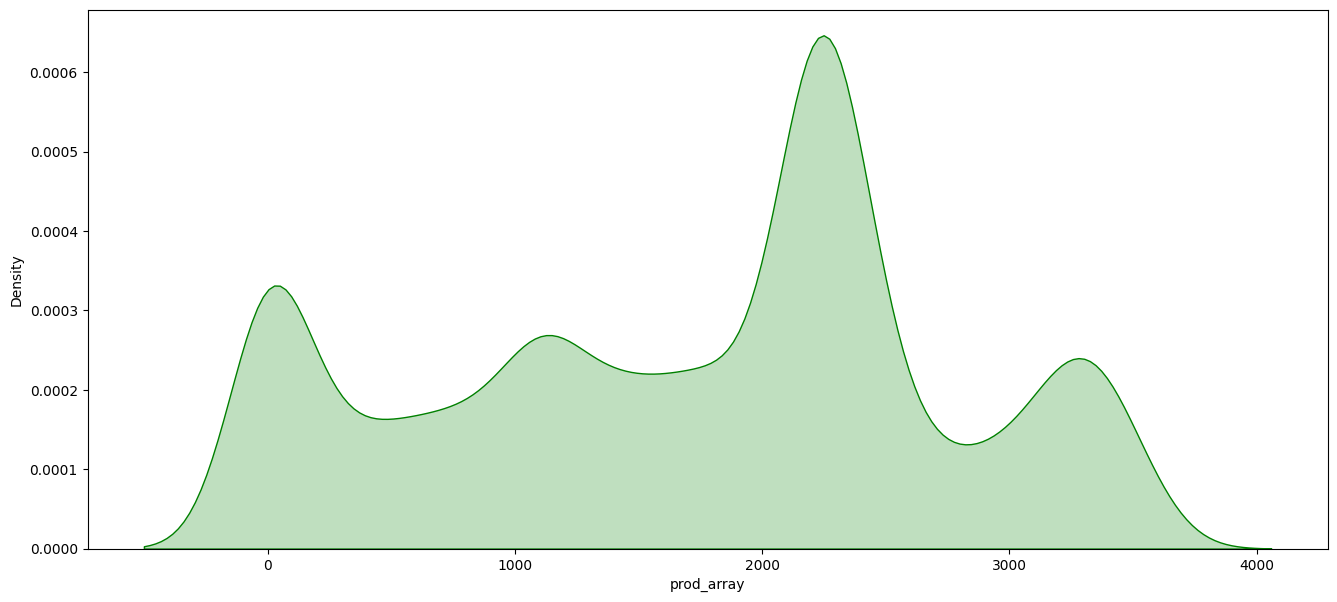

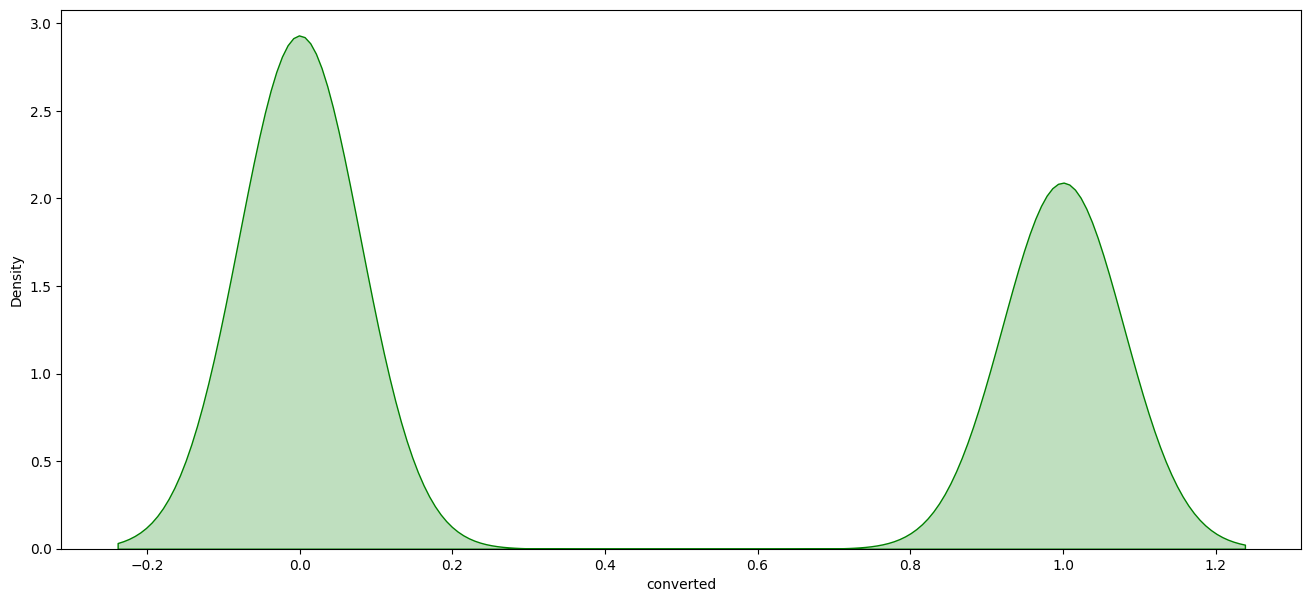

In [46]:
#Normality Checking
for i in data_inverse.columns:
    plt.figure(figsize=(16,7))
    sns.kdeplot(data = data_inverse[i],fill=True, color = 'g')
    plt.show()

In [48]:
#Feature Importance
build_data = data_inverse.drop("converted", axis =1)
label = data_inverse["converted"]

In [50]:
fs_model = RandomForestClassifier(n_estimators=30 , random_state=40)


In [51]:
fs_model.fit(build_data,label)

RandomForestClassifier(n_estimators=30, random_state=40)

In [52]:
fs_model.feature_importances_

array([1.93523415e-02, 1.21234687e-01, 7.95542818e-03, 1.27514013e-02,
       5.46547094e-02, 7.25446513e-02, 5.34028261e-02, 6.43651157e-02,
       3.88199031e-05, 5.93700020e-01])

In [56]:
fs_model_df = pd.DataFrame({ 
    "columns" : build_data.columns,
    "scores" :fs_model.feature_importances_*100
}).sort_values("scores",ascending=False)

In [57]:
fs_model_df

,columns,scores
9,prod_array,59.370002
1,os,12.123469
5,avg_sess_time,7.254465
7,visit_pd,6.436512
4,hist_session,5.465471
6,visitId,5.340283
0,browser,1.935234
3,region,1.275140
2,device_cat,0.795543
8,trans_rev,0.003882


In [60]:
data_req = data_inverse[["prod_array","os","avg_sess_time","visitId","hist_session","visitId","browser","region","converted"]]

In [61]:
data_req

,prod_array,os,avg_sess_time,visitId,hist_session,visitId,browser,region,converted
0,2265,1,722.666667,1617217803,6504,1617217803,5,71,0
1,898,1,445.214286,1617275532,12466,1617275532,5,2,1
2,2234,1,787.500000,1615301676,1575,1615301676,5,1,0
3,414,6,333.333333,1613977212,1000,1613977212,5,1,1
4,2506,1,406.555556,1617089505,3659,1617089505,5,25,1
...,...,...,...,...,...,...,...,...,...
9202,1,6,166.000000,1613761724,166,1613761724,5,1,0
9203,2265,1,566.428571,1617194911,15860,1617194911,5,1,0
9204,1353,6,122.714286,1617193032,859,1617193032,5,25,1
9205,2299,1,295.333333,1616641350,1772,1616641350,5,25,0


In [62]:
#Model  Building
data_train = data_req.drop("converted",axis=1)
label_train = data_req["converted"]

In [82]:
data_train

,prod_array,os,avg_sess_time,visitId,hist_session,visitId,browser,region
0,2265,1,722.666667,1617217803,6504,1617217803,5,71
1,898,1,445.214286,1617275532,12466,1617275532,5,2
2,2234,1,787.500000,1615301676,1575,1615301676,5,1
3,414,6,333.333333,1613977212,1000,1613977212,5,1
4,2506,1,406.555556,1617089505,3659,1617089505,5,25
...,...,...,...,...,...,...,...,...
9202,1,6,166.000000,1613761724,166,1613761724,5,1
9203,2265,1,566.428571,1617194911,15860,1617194911,5,1
9204,1353,6,122.714286,1617193032,859,1617193032,5,25
9205,2299,1,295.333333,1616641350,1772,1616641350,5,25


In [63]:
model = RandomForestClassifier(n_estimators=60,random_state=40)

In [64]:
model

RandomForestClassifier(n_estimators=60, random_state=40)

In [65]:
model.fit(data_train,label_train)

RandomForestClassifier(n_estimators=60, random_state=40)

In [66]:
predicted_values = model.predict(data_train)

In [67]:
predicted_values

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [70]:
acc_score = accuracy_score(label_train,predicted_values)

In [71]:
acc_score

1.0

In [72]:
prec_score = precision_score(label_train,predicted_values)

In [73]:
prec_score

1.0

In [74]:
f1_sc = f1_score(label_train,predicted_values)

In [75]:
f1_sc

1.0

In [76]:

rec_score = recall_score(label_train,predicted_values)

In [77]:
rec_score

1.0

In [79]:
#Saving the model
with open("model.pkl","wb") as mod:
    pickle.dump(model,mod)


In [80]:
#Read and predict the value -Deployment

with open("model.pkl","rb") as mod:
    pickle_model = pickle.load(mod)

In [81]:
pickle_model

RandomForestClassifier(n_estimators=60, random_state=40)

In [ ]:
#Predicting values using pickle model


In [ ]:
	prod_array	os	avg_sess_time	visitId	hist_session	visitId	browser	region
0	2265	1	722.666667	1617217803	6504	1617217803	5	71

In [85]:
data_input = np.array([[2265,1,722.666667,1617217803,6504,1617217803,5,71]])

In [88]:
predicted = pickle_model.predict(data_input)[0]

c:\Users\admin\Desktop\Final_Project_1\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [89]:
predicted

0

In [90]:
#Checking for converted or not converted 
if predicted==0:
    print("Converted")
else:
    print("Not converted")    

Converted
